# Trabalho de Sistemas Lineares I

## Grupo 2 - Diogo Lima, Karinna Caiaffa, Leandro Assis e Raiane Marinho

Este trabalho tem como objetivo o estudo do comportamente de um Sistema Linear de 2ª ordem com a seguinte função de transferência:

$$H(s) = \frac{(48+2\beta^2)}{s^2+2\beta s+(24+\beta^2)}$$

Que na forma canônica é escrita como:

$$H(s) = \dfrac{K\omega_{n}^2}{s^2+2\alpha\omega_{n}s + \omega_{n}^2}$$

As seguintes afirmações podem ser retiradas desta função de transferência:

$$\omega_{n} = \sqrt{24 + \beta^2}$$

$$\alpha = \frac{\beta}{\omega_{n}} \therefore \alpha = \frac{\beta}{\sqrt{24+\beta^2}}$$

$$K = 2$$

Caso $0 < \alpha < 1$, a frequência natural (nesse caso amortecida) é calculada como:

$$\omega_{n} = \sqrt{24+\beta^2}\times\sqrt{1-\alpha^2}$$

### Questão 1)

A resposta do sistema a uma entrada $f(t) = u(t)$ é:

$$y(t) = 2 - 2e^{-t\beta}\cos{(2t\sqrt{6})} + \frac{\beta\sqrt{6}\sin{(2t\sqrt{6}})}{12}$$

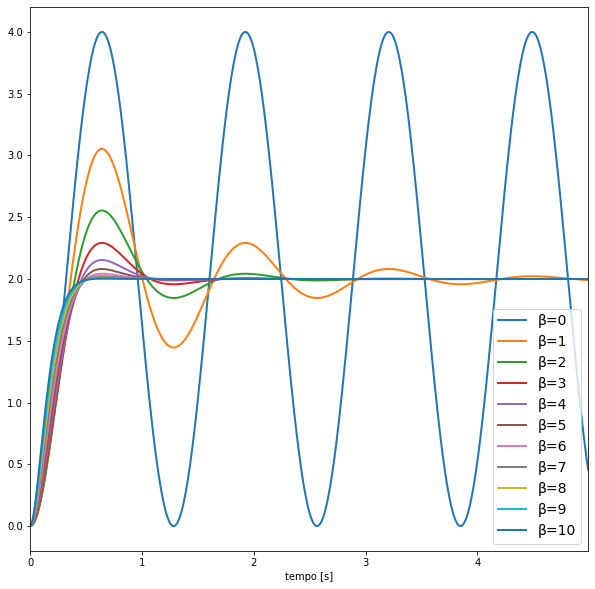

In [4]:
for beta in range(0,11): 
    y_f = InversaLaPlace(H_s(beta)*LaPlace(degrau)) # Cálculo da resposta ao estado zero para diferentes valores de beta
    intervalo = np.arange(0, 5, 0.01) # Criação do intervalo de tempo para o qual as funções y_f(t) serão plotadas
    symplot(y_f, intervalo, 'β='+str(beta), 'tempo [s]', 'y_f(t)') # Plotagem das funções com diferentes beta
    

Plotando as resposta a um degrau unitário para valores de $\beta$ de 0 à 10, obtém-se os gráficos acima. Como é possível notar, para valores de $\beta$ maiores que zero tem-se um sistema subamortecido que tende à estabilidade no valor do ganho estático (K) igual a 2 mais rapidamente conforme $\beta$ cresce.

Como deve-se escolher apenas 3 valores de $\beta$ que provoquem diferenças no gráfico produzido, escolhe-se, para seguir com o trabalho, os valores 0, 1 e 10. Fez-se essa escolha pois em $\beta$ igual a 0, o gráfico y(t) se torna um sinal periódico não amortecido com valor médio igual a K, em $\beta$ igual a 1 tem-se uma forte característica subamortecida na saída do sistema, e em $\beta$ igual a 10 observa-se  o comportamente criticamente amortecido com tempo de decaimento curto.

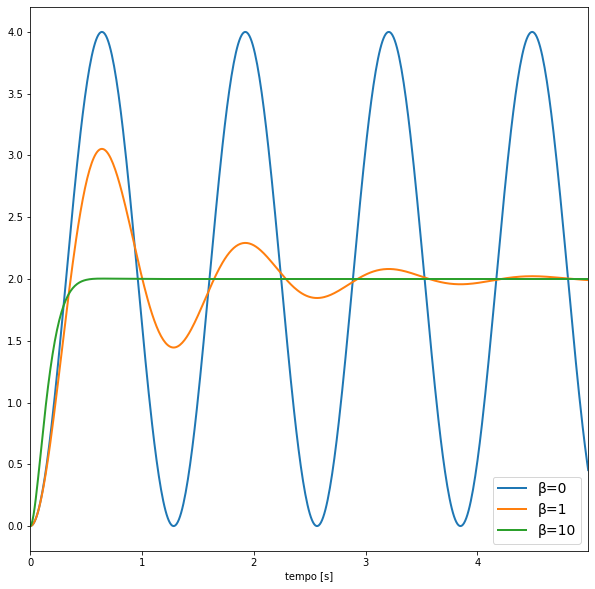

In [5]:
for beta in [0,1,10]:
    y_f = InversaLaPlace(H_s(beta)*LaPlace(degrau))
    intervalo = np.arange(0, 5, 0.01)
    symplot(y_f, intervalo, 'β='+str(beta), 'tempo [s]', 'y_f(t)')

O gráfico acima apresenta a resposta à um degrau unitário do sistema com os 3 valores de $\beta$ escolhidos.

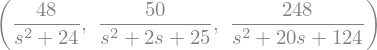

In [6]:
# Primeira linha - Apresentação das funções de transferência avaliadas nos valores de beta escolhidos
H_s(0), H_s(1), H_s(10)

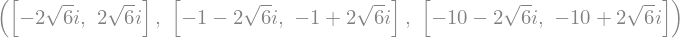

In [7]:
# Segunda linha - Cálculo dos pólos de cada função de transferência acima
polos(H_s(0).as_numer_denom()[1]), polos(H_s(1).as_numer_denom()[1]), polos(H_s(10).as_numer_denom()[1])

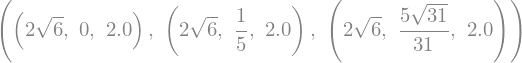

In [8]:
# Terceira linha - Análise de omega_n, alpha e K (na ordem) para cada beta em 0, 1 e 10, respectivamente
analise_linear(48, 0, 24), analise_linear(50, 2, 25), analise_linear(248, 20, 124)

Com o resultado das funções executadas acima, pode-se comentar sobre os gráficos apresentados acima.

Para todos os valores de $\beta$ analisados acima, percebe-se a convergência no valor do ganho estático (K = 2) e na frequencia natural amortecida ($\omega_{n}$ = $2\sqrt{6}$, obtido na terceira linha após o gráfico). Logo, podemos concluir que com a variação no valor de $\beta$, apenas observamos variação no coeficiente de amortecimento ($\alpha$). É importante ressaltar que após um tempo t suficientemente grande, todas as funções convergem para o valor de K = 2. Isso pode ser observado através da análise de y(t) em função de $\beta$. Onde com t tendendo para infinito, apenas o termo independente (a constante de valor 2 na fórmula no início da questão) se faz presente.

No gráfico de $\beta$ = 0, temos $H(s) = \frac{48}{s^2+24}$. Essa função de transferência possui pólos puramente complexos iguais a $\pm 2\sqrt{6}j$ (como obtido na segunda linha após o gráfico). Devido a esses pólos puramente complexos, temos como resposta um modo natural de regime permanente, ou seja, a resposta do sistema é não amortecido ($\alpha$ = 0 obtido na terceira linha após o gráfico), resultando na função nunca convergindo.

No gráfico de $\beta$ = 1, temos $H(s) = \frac{50}{s^2+2s+25}$. Essa função de transferência possui pólos localizados no SPLE (semiplano lateral esquerdo) iguais a $-1 \pm j2\sqrt{6}$. Pelos pólos não estarem mais unicamente sobre o eixo dos complexos, mas sim a esquerda do mesmo, a resposta tende a ser uma oscilação amortecida com o tempo, apresentando coeficiente de amortecimento igual a 0.2 ($\alpha$ = $\dfrac{1}{5}$), e descrevendo a convergência gradual de y(t) ao longo do tempo.

Já no gráfico de $\beta$ = 10, temos $H(s) = \frac{248}{s^2+20s+124}$. Essa função de transferência, assim como para $\beta$ = 1, representa uma resposta amortecida ao degrau unitário . Como é possível observar na linha 2 após o gráfico, os pólos possuem parte real bem maior (em módulo) do que as funções de transferências para os outros valores de $\beta$. Por conta disso observa-se um aumento nas características analisadas em $\beta = 1$, ou seja, o coeficiente de amortecimento aumenta em aproximadamente 4.5 vezes, denotando uma convergência mais brusca em direção ao ganho estatico (K = 2).

### Questão 2)

In [9]:
# Printa as três expressões da resposta em frequência H(jomega) para os valores de beta
intervalo = np.arange(0, 1000.1, 0.1)
H_jw = []
for beta in [0,1,10]:
    s = j*omega  # Define s = 0 + jomega
    H_jw.append(H_s(beta)) # Calcula o valor da resposta em frequência H(jomega) para cada valor escolhido para beta

Para $\beta$ = 0 tem-se:
$$H(j\omega) = \frac{48}{24-\omega^2}$$
$$|H(j\omega)| = -20\log{(-\omega^2+24)} + 20\log{(48)}$$
$$\Theta{(H(j\omega))} = 0$$

Para $\beta$ = 1 tem-se:
$$H(j\omega) = \frac{50}{-\omega^2+ 2j\omega + 25}$$
$$|H(j\omega)| = -20\log{(\sqrt{4\omega^2+ (25-\omega^2)^2})} + 20\log{(50)}$$
$$\Theta{(H(j\omega))} = -\arctan{(\frac{2\omega}{25-\omega^2})}$$

Para $\beta$ = 10 tem-se:
$$H(j\omega) = \frac{248}{-\omega^2+ 20j\omega + 124}$$
$$|H(j\omega)| = -20\log{(\sqrt{400\omega^2+ (124-\omega^2)^2})} + 20\log{(248)}$$
$$\Theta{(H(j\omega))} = -\arctan{(\frac{20\omega}{124 - \omega^2})}$$

Analisando por simulação as expressões analíticas acima, pode-se concluir que:

Para $\beta$ = 0, o diagrama de módulo terá pico de ressonância em $\omega = 2\sqrt{6}$, e o diagrama de fase apresentará mudança de fase tendendo a -180º (-90º para cada pólo).

Para $\beta$ = 1 e para $\beta = 10$, os diagramas de módulo  e fase terão o mesmo comportamente que para $\beta = 0$, mas em $\omega = 5$ e $\omega = \sqrt{124}$, respectivamente. A principal diferença esperada para os diagramas desses valores é a suavização do pico de ressonância e da mudança de fase.

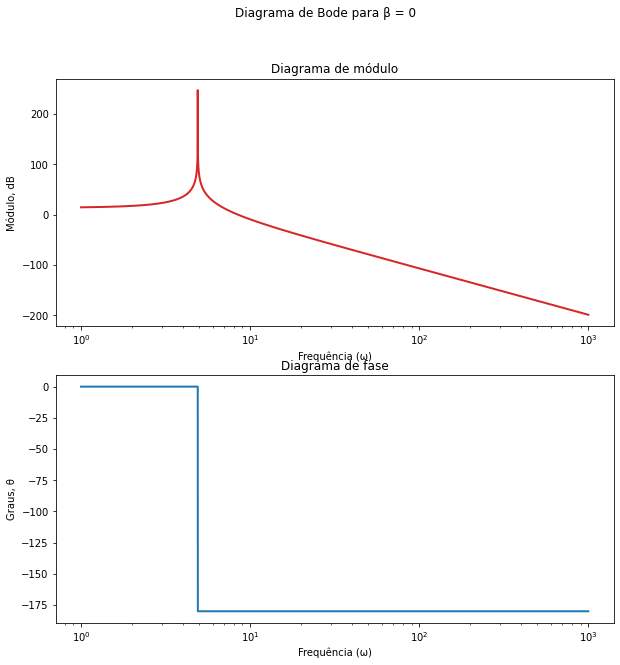

In [10]:
# Diagrama de Bode para beta = 0
intervalo = np.arange(1, 1000.1, 0.001)
DiagramaDeBode(Modulo(H_jw[0].as_numer_denom()[0], H_jw[0].as_numer_denom()[1]), Fase(H_jw[0].as_numer_denom()[0], H_jw[0].as_numer_denom()[1]), intervalo , 'Diagrama de Bode para β = 0', yticks=[-100, -50, 0, 50, 100, 150, 200, 250, 300])

No Diagrama de Bode acima, calculado sobre $\beta$ = 0, nota-se exatamente o esperado pela simulação teórica da resposta em frequência $H(j\omega)$. Em relação ao diagrama de módulo, podemos observar a constância do módulo no valor de ganho provocado pelo numerador da função resposta em frequência para valores de $\omega << \omega_{n}$. Quando $\omega$ se aproxima suficientemente de $\omega_{n}$, observa-se a amplitude no pico de ressonância tendendo a uma assíntota vertical de forma abrupta e sem suavização. Notamos também o desvio angular assintótico nesse mesmo valor $\omega$, tendendo para -180º para valores de $\omega >> \omega_{n}$

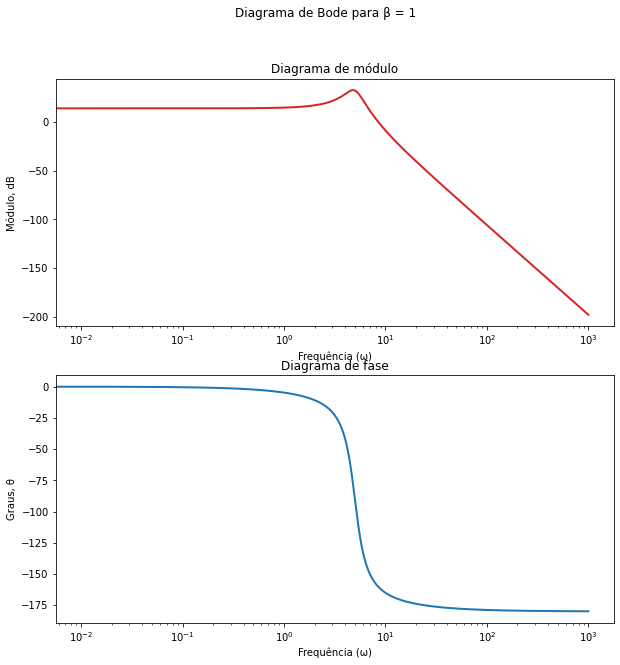

In [11]:
# Diagrama de Bode para beta igual a 1
intervalo = np.arange(0, 1000.1, 0.01)
DiagramaDeBode(Modulo(H_jw[1].as_numer_denom()[0], H_jw[1].as_numer_denom()[1]), Fase(H_jw[1].as_numer_denom()[0], H_jw[1].as_numer_denom()[1]), intervalo,'Diagrama de Bode para β = 1', yticks=np.arange(-100, 45, 20))

Neste Diagrama de Bode, pode-se observar um comportamento similar ao primeiro no diagrama de módulo. A diferença principal está na mudança de um assíntota vertical para uma curva mais suave na frequência de ressonância no diagrama de fase. Essa suavização está relacionada ao pólo não ser mais puramente complexo, ou seja, possui um valor de coeficiente de amortecimento.

No diagrama de fase, ao se aproximar da frequência $\omega_{n}$, tem-se uma mudança de fase com suavização baixa (mas não nula como no exemplo anterior) proporcional ao valor de $\alpha$ que, por conta do pólo da função de transferência em $\beta$ = 1 possuir componente real muito inferior à componente imaginária, é um valor relativamente pequeno.

O desvio de fase é 0º para valores de $\omega$ << $\omega_{n}$ e tende a -180º quando $\omega$ >> $\omega_{n}.$

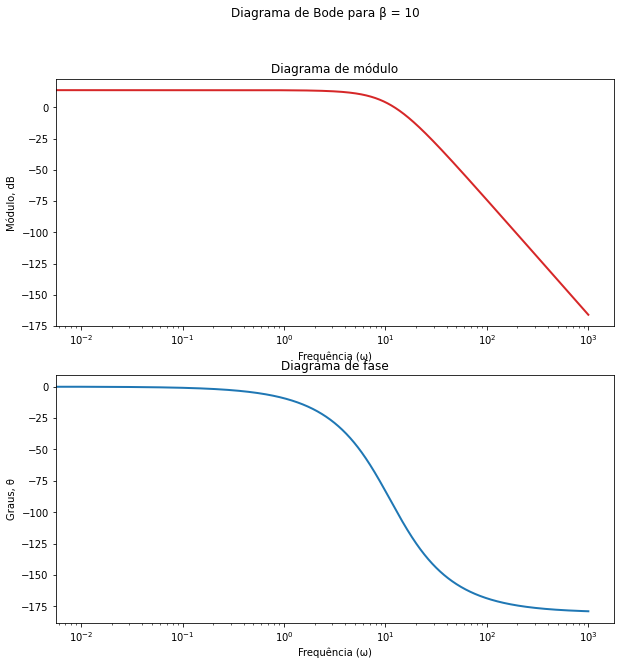

In [12]:
# Diagrama de Bode para beta igual a 10
DiagramaDeBode(Modulo(H_jw[2].as_numer_denom()[0], H_jw[2].as_numer_denom()[1]), Fase(H_jw[2].as_numer_denom()[0], H_jw[2].as_numer_denom()[1]), intervalo, 'Diagrama de Bode para β = 10', yticks=np.arange(-80, 20, 20))

Assim como no Diagrama de Bode anterior, para $\beta$ = 10 há um suavização na frequência ressonância. Essa suavização notável está diretamente associada ao valor de $\alpha$ que é 4.5 vezes maior que para $\beta$ = 1, resultando em um gráfico com variação de fase suaves e sem picos de ressonância pois $\alpha = \xi > \frac{\sqrt{2}}{2}$.

É notável a variação linear (por conta da alta suavização) do desvio de fase variando de 0º até -180º.

Para os diferentes valores de $\beta$ apresentados nos gráficos foi possível observar a diferença de módulo para os mesmos valores de frequência. Essa diferença (em $\beta$ = 0 e $\beta$ = 1 os valores são menores que 0 em praticamente todo $\omega$ e em $\beta$ = 10 é maior que 0 até $\omega$ $\approx$ 12) está relacionada com o ganho provocado pela constante no numerador da função de transferência. Para $\beta$ = 0, por exemplo, para $\omega$ = 0 tem-se o módulo resultando em uma diminuição de amplitude.

### Questão 3)

Para seguir com o desenvolvimento dessa questão, escolheu-se $\beta = 3$ e os valores de frequência $\omega = 2\sqrt{6}, 10, 15$. 

Os valores foram escolhidos pois queria-se analisar a resposta do sistema relacionado ao pico de ressonância em $\omega = 2\sqrt{6}$ e como esta resposta se comportaria para os valores proxímos aos múltiplos inteiros deste valor.

Através da simulação teórica conclui-se que para o valor de $\beta$ escolhido a amplitude da resposta em regime permanente deve diminuir quanto maior for a frequência fundamental do sinal de entrada. Além disso, espera-se um deslocamento de fase entre 0 e -180º, se aproximando mais deste limite inferior proporcionalmente a frequência do sinal de entrada.

In [13]:
# f_entrada = sen(omega t)
beta = 3 # Escolhe-se o valor de beta = 3 arbitrariamente
y_rp = []
yt = []
desvios, ganhos = [], []
for omega in [2*sp.sqrt(6), 10, 15]:
    s = sp.symbols('s', real=True)
    yt.append(InversaLaPlace(H_s(beta)*LaPlace(sp.sin(omega*t))))
    s = j*omega
    mod = Modulo(H_s(beta).as_numer_denom()[0], H_s(beta).as_numer_denom()[1], False)
    fase = Fase(H_s(beta).as_numer_denom()[0], H_s(beta).as_numer_denom()[1])
    if fase >= 0:
        fase -= 180
    desvios.append(fase)
    ganhos.append(mod)
    y_rp.append(mod*sp.sin(omega*t + fase)) # Salva o valor de y_rp = mod*sen(omega t + θ)
    
# Criação de uma matriz com as equações de y_rp para cada frequência escolhida

Para o sinal senoidal:

$$f = \sin{(\omega t)}$$

Tem-se resposta em RP em função de $\omega$ é:

$$y_{RP} = |H(j\omega)|A\sin{(\omega t + \theta)}$$

onde:

$\theta(t) = \arctan{(\frac{Im(numerador_{H(j\omega)})}{Re(numerador_{H(j\omega)})})} - \arctan{(\frac{Im(denominador_{H(j\omega)})}{Re(denominador_{H(j\omega)})})}$

$A = 1$

As expressões analíticas da resposta do sistema para cada $\omega$ são apresentadas abaixo:

Para $\omega = 2\sqrt{6}$: $y(t) = (0.63\sin{(2t\sqrt{6})} - 0.84\sqrt{6}\cos{(2t\sqrt{6})} + (0.63\sin{(2t\sqrt{6}) + 0.84\sqrt{6}\cos{(2t\sqrt{6})})e^{-3t}})u(t)$


Para $\omega = 10$: $y(t) = (-0.55\sin{(10t)}-0.49\cos{(10t)} + (0.58\sqrt{6}\sin{(2t\sqrt{6})}+0.49\cos{(2t\sqrt{6})})e^{-3t})u(t)$


Para $\omega = 15$: $y(t) = (-0.28\sin{(15t) - 0.13\cos{(15t)}} + (0.39\sqrt{6}\sin{(2t\sqrt{6})}+0.13\cos{(2t\sqrt{6})})e^{-3t})u(t)$

Como é possível observar pelas expressões analíticas, o sistema possui uma resposta transitória (todos os termos com $e^{-3t}$) com decaimento igual a $\beta$ e uma resposta em regime permanente resultante da parte da resposta que não possui termo exponencial.

O esperado para os gráficos dessas expressões são curvas que até um certo intervalo $t$, inversamente proporcional à frequência do sinal senoidal de entrada, apresentará um comportamento subamortecido, ou seja, entre 0 até $t$ haverá um pico de sobrepasso que decairá exponencialmente. Após um tempo suficientemente grande, a resposta se tornará puramente a resposta em regime permanente, com amplitude e deslocamento angular de acordo com a função de transferência $H(j\omega)$.

Vale ressaltar que o deslocamento angular da parte permanente e o tempo de decaimento da parte transitória estão relacionados.

Abaixo esboça-se os gráficos da resposta puramente em regime permanente e da resposta total do sistema para uma entrada senoidal de frequências escolhidas acima.

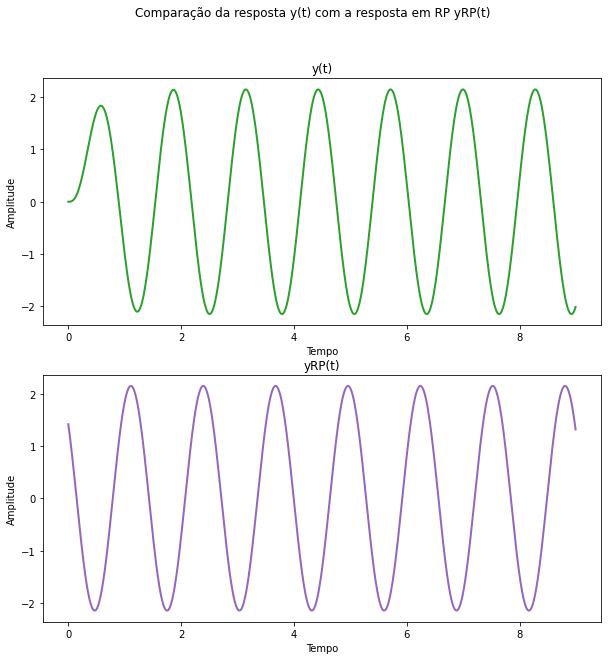

In [14]:
intervalo = np.arange(0, 9, 0.01)
duplot(yt[0], y_rp[0], intervalo, 'Tempo', 'Amplitude', ['y(t)','yRP(t)'],'Comparação da resposta y(t) com a resposta em RP yRP(t)')
# Plota a comparação de y_rp(t) e y(t) para omega = 2sqrt(6)

Para a frequência $\omega = 2\sqrt{6}$ (frequência de ressonância) nota-se a resposta em regime permanente com ganho de amplitude pouco superior a 2.1 vezes, e atraso angular de aproximadamente 73º.

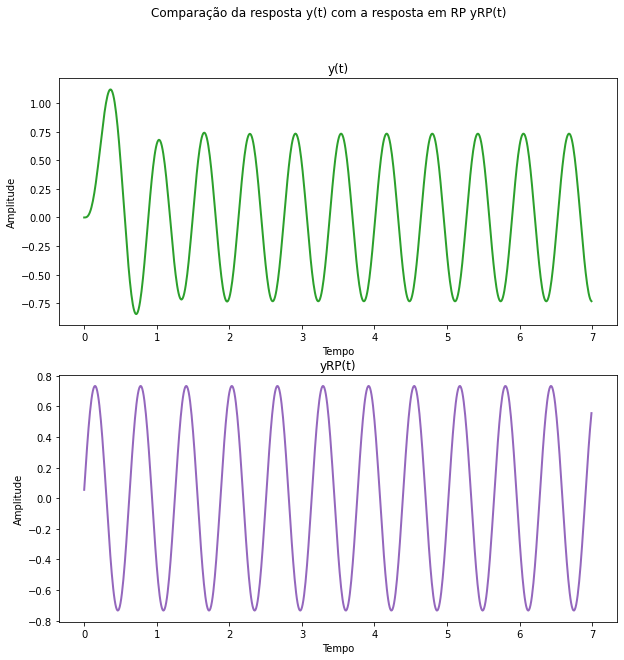

In [15]:
intervalo = np.arange(0, 7, 0.01)
duplot(yt[1], y_rp[1], intervalo, 'Tempo', 'Amplitude', ['y(t)','yRP(t)'],'Comparação da resposta y(t) com a resposta em RP yRP(t)')
# Plota a comparação de y_rp(t) e y(t) para omega = 10

Para a frequência $\omega$ = 10 nota-se a resposta em regime permanente com diminuição de amplitude de 0.73 vezes, e atraso angular de 138º.

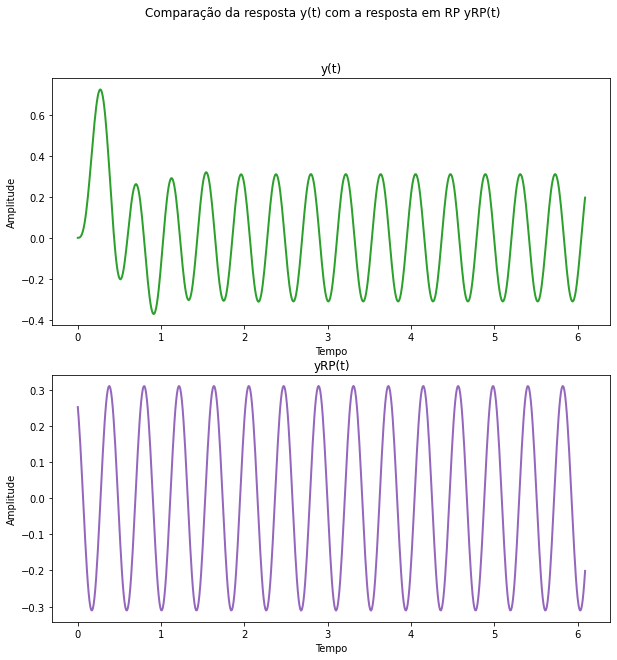

In [16]:
intervalo = np.arange(0, 6.1, 0.01)
duplot(yt[2] ,y_rp[2], intervalo, 'Tempo', 'Amplitude', ['y(t)','yRP(t)'],'Comparação da resposta y(t) com a resposta em RP yRP(t)')
# Plota a comparação de y_rp(t) e y(t) para omega = 15

Para a frequência $\omega$ = 15 nota-se a resposta em regime permanente com diminuição de amplitude de aproximadamente 0.32 vezes, e atraso angular de 155º.

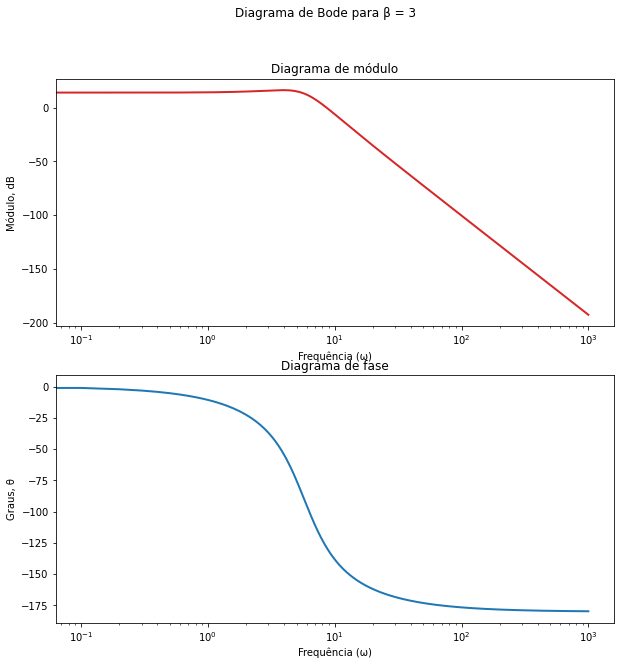

In [17]:
omega = sp.symbols('omega')
s =  j*omega
DiagramaDeBode(Modulo(H_s(beta).as_numer_denom()[0], H_s(beta).as_numer_denom()[1]), Fase(H_s(beta).as_numer_denom()[0], H_s(beta).as_numer_denom()[1]), np.arange(0, 1000.1, 0.1), 'Diagrama de Bode para β = 3', demo=True, yticks=np.arange(-80,20,20))

Como forma de explicar mais facilmente o fenômeno que ocorre sobre os sinais em diferentes frequências, esboça-se o Diagrama de Bode da resposta em frequência H(j$\omega$) avaliada em $\beta$ = 3.

Observando o diagrama de módulo observa-se uma amplificação relativa ao ganho da função H(j$\omega$) para frequências entre 0 e $\omega_{n}$. Para valores de frequência mais altos há uma perda de amplitude de aproximadamente -40dB/déc, aproximadamente a partir de $\omega_{n}$.

Analisando o diagrama de fase percebe-se que não há deslocamento de fase para baixas frequência. Para valores de $\omega >> \omega_{n}$, o deslocamento de fase tende de forma exponencial para -180°.

### Questão 4)

Para fazer essa questão adotamos o sinal periódico escrito analiticamente como $y(t) = t$, se 0 $\leq$ t < 2, uma onda dente de serra com T = 2 e $\omega_{0} = \pi$. A seguir esboça-se o gráfico desse sinal.

![Sinal original](sinal_entrada.png)

Fazendo o cálculo da Série de Fourier desse sinal obtém-se:

$$y(t) = 1 - \sum_{n=1}^{\infty}\frac{2\sin{(n\pi t)}}{n\pi}$$

Foram retiradas duas somas truncadas da Série de Fourier do sinal $y(t)$ com, respectivamente, 3 e 15 termos. As imagens abaixo apresentam os gráficos das somas de 3 e 15 termos, respectivamente.

![Soma truncada com 3 termos](sinal_entrada_3termos.png)

![Soma truncada com 15 termos](sinal_entrada_15termos.png)

Como esperado, quanto mais termos a soma truncada possui mais este sinal aproxima o sinal real. No caso do sinal escolhido, com 15 termos o sinal já apresenta bem menos erros do que a soma truncada de 3 termos.

A seguir, esboça-se os gráficos das respostas ao estado zero para cada um dos sinais acima.


![Resposta ao sinal de entrada](resposta_entrada.png)

![Resposta soma 3 termos](resposta_entrada_3termos.png)

![Resposta soma 15 termos](resposta_entrada_15termos.png)

![Comparação das respostas](comparacaofinal.png)

É notável que, assim como a Série de Fourier com mais termos aproxima melhor o sinal original, a somas truncada com mais termos também aproxima melhor a resposta ao sinal. Ou seja, sabendo que a Série de Fourier é um somatório de termos senoidais e cossenoidais (ou puramente senoidal como no caso do sinal dente de serra) com amplitudes e desvios característicos para cada harmônico, pode-se concluir que com um número suficientemente grande de termos da Série de Fourier o sinal original e sua resposta são aproximados de forma satisfatória.

No caso do sinal escolhido, 15 termos é o suficiente para aproximar com erro mínimo a resposta esperada para $y(t)$.

### Questão 5)

Qualquer sistema físico que possa ser modelado linearmente como um sistema de segunda ordem apresenta uma função de  transferência similar àquela a qual foi feita a análise neste relatório. Para descrever um sistema físico dentro da área de estudo do curso, escolhe-se um circuito RLC em série no qual busca-se analisar uma solução geral que relacione a corrente do circuito para uma entrada de tensão.

A fim de identificar a expressão analítica da corrente em função da entrada de tensão, modela-se o sistema seguindo a Lei de Kirchhoff como descrito abaixo:

$$V_{L} + V_{R} + V_{C} = V_{fonte}$$

Como é de conhecimento geral, podemos substituir os valores da seguinte forma:

$$\dfrac{dV_{R}}{dt} = R\times \dfrac{di}{dt}$$
$$\dfrac{dV_{L}}{dt} = L\times \dfrac{d^2i2}{dt^2}$$
$$\dfrac{dV_{C}}{dt} = \frac{1}{C}\times i \therefore i = C \times \dfrac{dV_{C}}{dt}$$
$$V_{C} = \frac{1}{C}\times \int_{0}^{t}i \,dt$$

Com essas substituições temos a expressão analítica, dividindo ambos os lados por L:

$$\dfrac{d^2i}{dt^2} + \frac{R}{L}\times \dfrac{di}{dt} + \frac{i}{LC} = \frac{1}{L}\dfrac{dV_{fonte}}{dt}$$

Ou seja, esse sistema linear possui função de transferência relacionando $V_{fonte}(t)$ e $i(t)$ igual a:

$$H(s) = \frac{\frac{1}{L}}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$$

Comparando a função de transferência obtida com a apresentada para este trabalho, pode-se chegar as seguintes relações entre os valores de R, L, C e $\beta$:

$$L = \frac{1}{2\beta^2+48}$$

$$R = \frac{\beta}{\beta^2+24}$$

$$C = 2$$

O componente que influencia no valor de $\beta$ é o resistor. Através da alteração do valor do mesmo, a resposta do sistema poderá operar em regime super-crítico, crítico ou sub-crítico.

### Conclusão

Como apresentado no início deste trabalho, o valor do coeficiente de amortecimento ($\alpha$) depende do $\beta$ escolhido, tornando $\alpha$ mais próximo de 1 conforme $\beta$ cresce. Mais precisamente, o valor de $\beta$ é o que determina a taxa de decaimento do sinal (se 0 < $\alpha$ < 1), ou seja, quando $\beta$ cresce o sinal tende a estabilidade mais rapidamente, até que em certo ponto o valor de $\alpha$ se aproxima suficientemente de 1 e o sistema possui comportamento super amortecido.

Além disso, como o coeficiente de amortecimento $\alpha$ é uma função de $\beta$, podemos afirmar que o percentual de sobrepasso depende diretamente de $\beta$. Isto é, enquanto $\beta$ cresce (de forma que, é claro, $\alpha$ jamais alcance o valor 1), o percentual de sobrepasso decresce.

## Apêndice: Código fonte principal das funções usadas ao longo do trabalho

In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
# Importação de bibliotecas para desenvolvimento dos cálculos (sympy e numpy) e plotagem dos gráficos (matplotlib)

In [19]:
sp.init_printing()

plt.rcParams['figure.figsize'] = 10, 10            # Define o tamanho dos gráficos
plt.rcParams['legend.fontsize'] = 14               # Define o tamanho da fonte da legenda
plt.rcParams['lines.linewidth'] = 2                # Define a espessura dos gráficos
plt.rcParams['axes.grid'] = False                  # Desabilita a quadriculação dos gráficos

t = sp.symbols('t', real=True)                     # Define a variável t 
s = sp.symbols('s', real=False)                    # Define a variável de La Place s
j = sp.I*1                                         # Define j como complexo, ao invés de i 
omega, beta = sp.symbols('omega, beta', real=True) # Define omega e beta
mod, fase = sp.symbols('M, teta', real=True)       # Define variáveis para módulo e fase
degrau = sp.Heaviside(t)                           # Define a função degrau unitário u(t)

# Configuração da saída visual e criação das variáveis empregadas ao longo do trabalho

In [20]:
def LaPlace(funcao): # Função de cálculo da transformada de laPlace
    return sp.laplace_transform(funcao, t, s)[0]

def InversaLaPlace(Funcao): #Função de cálculo da inversa de LaPlace
    return sp.inverse_laplace_transform(Funcao, s, t, noconds=True)

def Fourier(funcao): # Função de cálculo da transformada de LaPlace
    s = I*omega
    return sp.laplace_transform(funcao, t, s, noconds=True)

def SeriedeFourier(funcao, t_0, t_f): # Função de cálculo da série de fourier
    return sp.fourier_series(funcao, (t, t_0, t_f))  

def H_s(beta): # Função de transferência do sistema estudado neste trabalho
    return (48+2*beta**2)/(s**2+2*beta*s+(24+beta**2))

def symplot(F, intervalo, funLabel, xLabel, yLabel, legend=True, multiGraficos=True): # Função para plotar gráficos
    f_num = np.zeros(intervalo.shape)
    for indT in range(0, intervalo.size):
        f_num[indT] = F.evalf(subs={t:intervalo[indT]})

    plt.plot(intervalo, f_num, label=funLabel)
    if legend:
        plt.legend();
    plt.xlim([min(intervalo), max(intervalo)]);
    plt.xlabel(xLabel);
    if not multiGraficos:
        plt.close()
        
def duplot(F1, F2, intervalo, xLabel, yLabel, nome, titulo): # Função para plotar dois gráficos quaisquer
    fig, (funcao1, funcao2) = plt.subplots(2)
    fig.suptitle(titulo)
    
    for loop in range(2):
        if loop == 0: # Iteração para esboçar gráfico de módulo
            f_num = np.zeros(intervalo.shape)
            for indT in range(0, intervalo.size):
                f_num[indT] = F1.evalf(subs={t:intervalo[indT]})
            funcao1.plot(intervalo, f_num, 'tab:green')
            funcao1.set_title(nome[0])
            funcao1.set(xlabel=xLabel, ylabel=yLabel)
        else:
            for indT in range(0, intervalo.size):
                f_num[indT] = F2.evalf(subs={t:intervalo[indT]})
            funcao2.plot(intervalo, f_num, 'tab:purple')
            funcao2.set_title(nome[1])
            funcao2.set(xlabel=xLabel, ylabel=yLabel)
            
def polos(func, simbolo=s): # Função para calcular os pólos de uma função de transferência H(s)
    return sp.solve(func, simbolo)

def analise_linear(b0, a1, a0): # Recebe os valores de b0, a1 e a0 e retorna os valores de wn, alpha e K
    wn = sp.sqrt(a0)
    alpha = a1/(2*wn)
    K = b0/a0
    if 0 < alpha and alpha < 1: # Caso o sistema seja subamortecido
        wn = wn*sp.sqrt(1-alpha**2)
    return wn, alpha, K

def Modulo(numerador, denominador, diagramaBode=True): # Função para calcular o módulo de uma resposta em frequência H(jomega)
    if diagramaBode:
        return 20*sp.log(sp.sqrt(sp.re(numerador)**2+ sp.im(numerador)**2)) - 20*sp.log(sp.sqrt(sp.re(denominador)**2+ sp.im(denominador)**2))
    return sp.sqrt(sp.re(numerador)**2+ sp.im(numerador)**2)/sp.sqrt(sp.re(denominador)**2+ sp.im(denominador)**2)
    
def Fase(numerador, denominador): # Função para calcular a fase de uma resposta em frequência H(jomega)
    return (180/sp.pi)*(sp.atan(sp.im(numerador)/sp.re(numerador)) - sp.atan(sp.im(denominador)/sp.re(denominador)))

def DiagramaDeBode(funcaoModulo, funcaoFase, intervalo, titulo, demo=False, yticks=[]): # Função que plota os gráficos de módulo e fase de uma função
    fig, (Gmodulo, Gfase) = plt.subplots(2)
    fig.suptitle(titulo)
    
    #plt.setp(Gfase, xticks=[0.1, 10, 100], xticklabels=['0.1', '10¹', '10²'], yticks=np.arange(0, -185, -25))
    #plt.setp(Gmodulo, yticks=yticks)
    
    for loop in range(2):
        if loop == 0: # Iteração para esboçar gráfico de módulo
            f_num = np.zeros(intervalo.shape)
            for indW in range(0, intervalo.size):
                f_num[indW] = funcaoModulo.evalf(subs={omega:intervalo[indW]})
            Gmodulo.plot(intervalo, f_num, 'tab:red')
            Gmodulo.set_title('Diagrama de módulo')
            Gmodulo.set(xlabel='Frequência (ω)', ylabel='Módulo, dB')
            Gmodulo.set_xscale('log')
    
        else:
            indice = 0
            try:
                omega_correcao = sp.sqrt((funcaoFase*sp.pi/180).args[1].args[0].args[2].args[0].args[0])
            except:
                omega_correcao = sp.sqrt(24)
                if demo:
                    omega_correcao = sp.sqrt(33)
                pass
            
            for indW in intervalo:
                if indW >= 0 and indW <= omega_correcao:
                    f_num[indice] = funcaoFase.evalf(subs={omega:indW})
                elif indW > omega_correcao:
                    f_num[indice] = funcaoFase.evalf(subs={omega:indW})-180
                indice+=1
            Gfase.plot(intervalo, f_num, 'tab:blue')
            Gfase.set_title('Diagrama de fase')
            Gfase.set(xlabel='Frequência (ω)', ylabel='Graus, θ')
            Gfase.set_xscale('log')
            
        
# Definição das funções úteis ao longo do trabalho